# Lab 4A - Coordinate Systems, Coordinate Transformations, and Jacobians

Today, we'll discuss _coordinate transformations_ and how integrals transform under coordinate transformations. A key concept here, one that is somewhat abstract, is the distinction between the points of a geometric object and the coordinate system used to describe these points. 

## Coordinate Systems

A _coordinate system_ on a geometric object is a particular labeling of the points in the geometric object by numerical vectors. For example, for the number line $\mathbb{R}$, there is the standard coordinate system $x$: we label each point using the number that it represents. However, we could also choose a nonstandard coordinate system $y := x^3$. Now, the number $2$ is given the label $y=2^3 = 8$, and the number $-3$ is given the label $y=(-3)^3 = -27$. You could think of this as traveling to an alternate universe, where all the numbers have different names. But, to reiterate the most crucial point: at the end of the day, we are using two _different labelings_ to describe the _same set of points_.

<img src="Lab 4A Images/r-coords.png" style="width: 650px;"/>

Here's another example. Our geometric object will be $\mathbb{R}^2$. We can describe points on $\mathbb{R}^2$ using the standard coordinate system $(x,y)$, or using polar coordinates $(r,\theta)$. Now the transformation between coordinate systems is given by the equations $$x = r\cos(\theta)$$ $$y = r\sin(\theta)$$

<img src="Lab 4A Images/r2-coords.png" style="width: 650px;"/>

Normally, we think of functions as objects that eat numbers (or vectors). Another perspective is to instead think of functions as objects that eat _points_. Now, we might express a single function using different coordinate systems, but we can think of these as _different formulas for the same underlying function_ rather than as different functions. So, for example, consider the function $f$ defined on $\mathbb{R}$ which has the formula, in standard coordinates, $f(x) = x^7$. We can re-express this in the nonstandard coordinate system $y$ as $$f(y) = (T_{x\to y} (x))^7 = y^{7/3}$$ Here $T_{x\to y}$ denotes the coordinate transformation function; it takes as input the label for a point in $x$ coordinates and outputs the label for the same point but in $y$ coordinates. The formula for $f$ is different when we use the nonstandard $y$ coordinates rather than standard $x$ coordinates to label the inputs. **Confusing point**: here, we are only changing the coordinates in which we express the input of $f$, but not the coordinates in which we express the output (for this class, the output coordinates will always be fixed to the standard coordinate system).

In the above example, there isn't any obvious utility to changing coordinate systems. However, depending on the form of the function of interest, calculations might become much simpler in one coordinate system over another. For instance, the function $f(x,y) = \sqrt{x^2 + y^2}$, when written in polar coordinates, has the shape $f(r, \theta) = r$, which is a much simpler expression to work with if you're doing some hairy algebra.



## Change of Variables in 1D

In the framework above, we've given a _coordinate-independent_ meaning to the word "function": the domain of the function is thought to be the set of points of the geometric object, and we are referring to this same function regardless of the coordinate system we use to write down a formula for the function. We can similarly provide a coordinate-independent meaning to the word "integral" and we'll begin by doing this for functions that eat points in $\mathbb{R}$. Suppose $f$ is a function with domain $\mathbb{R}$, and consider an interval $I$ of points. Our coordinate-independent notion of integral is $$\int_{I} f := \lim_{N\to \infty} \text{Length}(I) \cdot \frac{1}{N} \sum_{i=1}^{N} f(p_i)$$ where the $p_i$ are points chosen uniformly at random from $I$. Uniformly at random means that all points in the interval $I$ are equally likely to be chosen. Make sure you understand why this ought to give the same answer as standard integration; this approach is called _Monte Carlo integration_.

Everything in the definition above is defined purely geometrically, without reference to a particular coordinate system; in particular, the length of the interval $I$ does not depend on the coordinates we use to write down its endpoints. 

Now, let $x$ (standard) and $y$ (nonstandard) denote two distinct coordinate systems on $\mathbb{R}$. Then, we get two different formulas for $f$: one which is expecting the input to be labeled using the standard $x$-coordinates, and another which is expecting the input to be labeled using the nonstandard $y$-coordinates. 
For concreteness, let's now work with the specific coordinate system $y = x^3$. Suppose that in standard coordinates, our interval $I$ is given by $[2,3]$. In nonstandard coordinates, this corresponds to the interval $[8,27]$.

Sampling points uniformly at random from the interval $I$ corresponds to choosing labels $x$ uniformly at random from $[2,3]$. The crucial observation is that this is **not** equivalent to choosing labels $y$ uniformly at random from $[8,27]$ and then converting from the $y$ coordinate system to the $x$ coordinate system using $T_{y\to x}$. Why does this matter? Say we're now trying to actually calculate the integral $\int_{I} f$ for some function $f$. In order to do this calculation explicitly, we'll have to choose a coordinate system to work in, i.e. pick a coordinate system in which to write down a formula for $f$. Remember that for our integration formula above, we are choosing _points_ uniformly at random. So, if we write down the formula for $f$ in nonstandard coordinates $y$, and then start sampling uniformly random labels from $[8,27]$, this will give the wrong answer! How can we correct this "probability distortion"?

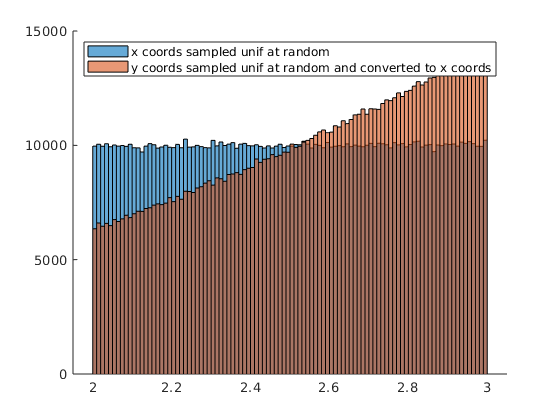

In [9]:
x = rand(1000000,1)*(3-2)+2 ; % choosing x labels uniformly at random from [2,3]

y = rand(1000000,1)*(27-8)+8 ; %choosing y labels uniformly at random from [8,27]
y_to_x = y.^(1/3) ; %converting y labels to x labels using 

hold on
histogram(x)
histogram(y_to_x)
legend(["x coords sampled unif at random" "y coords sampled unif at random and converted to x coords"])

Let's now think through how to correct the distortion. We want to sample $y$-coordinates such that the probability of landing in the interval $[x,x+dx]$ to be 

$$\frac{\text{Length}([x,x+dx])}{\text{Length}([2,3])} = dx$$ 

When we sample $y$-coordinates uniformly at random from $[8,27]$, suppose we get a label in $[y,y+dy]$. This occurs with probability $dy$. Now, getting a $y$ label in $[y,y+dy]$ corresponds to getting an actual _point_ (i.e. $x$ label) in $[T(y), T(y+dy)]$ where $T(y) = T_{y \to x} (y) = y^{1/3}$. The length of this interval is $T(y+dy) - T(y) \approx T'(y) dy$, and this is what the probability of getting a label in $[y,y+dy]$ _should_ be. Thus, we want our random selection scheme to output points close to $y$ exactly $T'(y)$ times more often than our current random selection scheme does. 

At the end of the day, we find that $$\int_{I} f = \int_{2}^{3} f(x) \, dx = \int_{T^{-1} (2)}^{T^{-1} (2)} f(y) T'(y) \, dy$$ This is where the formula for $u$-substitution comes from.

## Change of Variables in 2D

Consider now the case where we have a function $f$ which eats points in $\mathbb{R}^2$, and suppose we want to integrate over a square $S$. The coordinate-independent notion of integral here is analogous to the one given above for the 1D case: $$\int_{S} f := \lim_{N\to \infty} \text{Area}(S) \cdot \frac{1}{N} \sum_{i=1}^{N} f(p_i)$$ where the points $p_i$ are sampled uniformly at random from $S$.

We consider the standard coordinates $(x,y)$ and the nonstandard coordinates $(u,v)$, with corresponding transformation function given by $T(u,v) = (x,y)$. Suppose that $S = [0,1]\times [0,1]$ in standard coordinates. When we sample _points_, i.e. standard coordinate labels, the probability of landing in $[x,x+dx]\times[y,y+dy]$ is 

$$\frac{\text{Area}([x,x+dx]\times[y,y+dy])}{\text{Area}([0,1]\times[0,1])} = dx \cdot dy$$

Now, what happens if we do the wrong thing and sample $(u,v)$-labels for points and convert them afterwards into $(x,y)$-labels? The probability of landing in $[u,u+du]\times[v,v+dv]$ is $du \cdot dv$. 

The key geometric point here is that when $du$ and $dv$ are very small, the square with vertices $(u,v)$, $(u+du,v)$, $(u,v+dv)$, and $(u+du,v+du)$ gets mapped to a parallelogram with vertices $T(u,v)$, $T(u+du,v)$, $T(u,v+dv)$, and $T(u+du,v+du)$. You can see this using the cells below, which implement this transformation for the case where $(u,v)$ are polar coordinates.

In [11]:
T = @(v) [(v(1)^2+v(2)^2)^.5, atan(v(2)/v(1))];
% converts (x,y) to (r,theta)
%Tinv = @(v) [v(1)*cos(v(2)),v(1)*sin(v(2))]


In [12]:
%dTinv = @(v,dv) [dv(1)*cos(v(2))-v(1)*sin(v(2))*dv(2), dv(1)*sin(v(2))+v(1)*cos(v(2))*dv(2)]

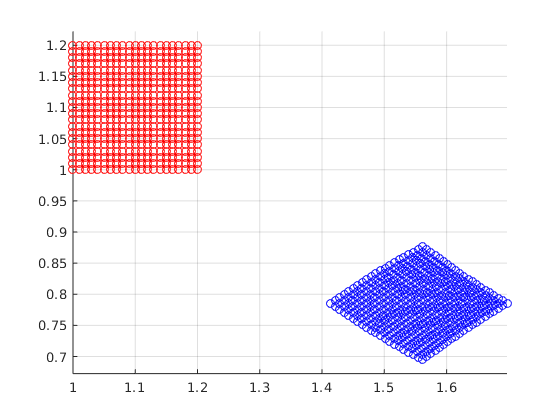

In [13]:
xvec = 1:.01:1.2; yvec = xvec;
[X,Y] = meshgrid(xvec,yvec);
series = [X(:),Y(:)];
Tseries = [];
for i=1:length(series)
    Tseries = [Tseries; T([series(i,1),series(i,2)])];
end;

hold on;
scatter(series(:,1), series(:,2),'r');
scatter(Tseries(:,1), Tseries(:,2),'b');
axis('equal');
grid on;

Thus, the correct probability of landing near the point $(u,v)$ should be the area of the parallelogram whose sides are the vectors $T(u+du,v)-T(u,v)$ and $T(u,v+dv)-T(u,v)$. Writing $T = (T_1, T_2)$ (i.e $T_1 (u,v) = x$ and $T_2 (u,v) = y$) we have $$T(u+du, v) - T(u,v) \approx \left( \frac{\partial T_1}{\partial u} du, \frac{\partial T_2}{\partial u} du  \right)$$ and $$T(u, v+dv) - T(u,v) \approx \left( \frac{\partial T_1}{\partial v} dv, \frac{\partial T_2}{\partial v} dv  \right)$$ Thus, the area of the parallelogram is the magnitude of the cross product of these two vectors, which comes out to 

$$\left| \frac{\partial T_1}{\partial u} \frac{\partial T_2}{\partial v} - \frac{\partial T_1}{\partial v} \frac{\partial T_2}{\partial u} \right|\cdot du \cdot dv$$ We call $$\mathcal{J}(u,v):= \left| \frac{\partial T_1}{\partial u} \frac{\partial T_2}{\partial v} - \frac{\partial T_1}{\partial v} \frac{\partial T_2}{\partial u} \right| \big\vert_{(u,v)}$$ the _Jacobian_ of $T$ at $(u,v)$, and this is the corresponding "probability distortion" factor. When we sample from $y$-labels, labels near $(u,v)$ should appear $\mathcal{J}(u,v)$ times more often than they do when we sample labels uniformly at random. 

We thus have the 2D change of variables formula: $$\int_{S} f = \int_{S} f(x,y) \, dx \, dy  = \int_{T^{-1} (S)} f(u,v) \mathcal{J}(u,v) \, du \, dv$$

## Examples

The Matlab function `integral2` can be used to numerically compute double integrals. It takes as its input a tuple `(fun, xmin, xmax, ymin, ymax)` which holds a function handle for the function we want to integrate, followed by the $x$ and $y$ bounds. Keep in mind that Matlab does the integration in the order $dy \cdot dx$ (i.e. integrates with respect to $y$, then with respect to $x$). This means that the $y$ bounds can be themselves functions of $x$.

**Example 1** 

Evaluate numerically $$\int_{-1}^{1} \int_{0}^{\sqrt{1-x^2}} \sqrt{x^2 + 2y^2} \, dy \, dx $$ Here we are integrating over the top half of the unit circle $x^2 + y^2 = 1$.

In [15]:
integral2(@(x,y) sqrt(x.^2 + 2*y.^2), -1,1,0,@(x) sqrt(1-x.^2))


ans =

    1.2734



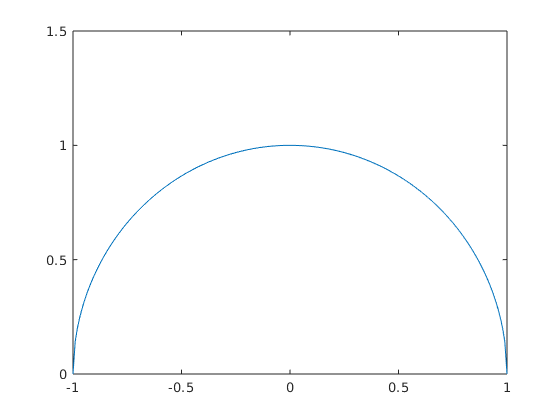

In [17]:
x=-1:0.01:1;
y=sqrt(1-x.^2);
plot(x,y)
ylim([0 1.5])

**Example 2** 

Evaluate numerically $$\int_{-1}^{1} \int_{0}^{\sqrt{1-y^2}} \sqrt{x^2 + 2y^2} \, dx \, dy $$ Here we are integrating over the right half of the unit circle $x^2 + y^2 = 1$.

In [20]:
integral2(@(x,y) sqrt(y.^2 + 2*x.^2), -1,1,0,@(x) sqrt(1-x.^2))
% swap x and y in the previous expression


ans =

    1.2734



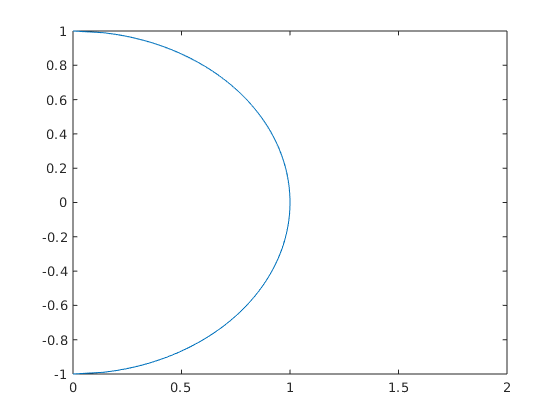

In [21]:
y=-1:0.01:1;
x=sqrt(1-x.^2);
plot(x,y)
xlim([0 2])

Why are these two integrals equal? Let's apply a coordinate transformation into polar coordinates. The transformation function $T(r,\theta) = (x,y)$ is given by $T(r,\theta) = (r\cos(\theta), r\sin(\theta))$. Thus, the Jacobian is $$\mathcal{J} =   \left| \frac{\partial (r\cos(\theta))}{\partial r} \frac{\partial (r\sin(\theta))}{\partial \theta} - \frac{\partial (r\cos(\theta))}{\partial \theta} \frac{\partial (r\sin(\theta))}{\partial r} \right|  = (r \cos^2(\theta) + r\sin^2 \theta)  = r$$ The first integral transforms to $$\int_{0}^{\pi} \int_{0}^{1} \sqrt{r^2 + r^2 \sin^2 (\theta)} \, r \, dr \, d\theta $$ and the second transforms to $$\int_{-\pi/2}^{\pi/2} \int_{0}^{1} \sqrt{r^2 + r^2 \sin^2 (\theta)} \, r \, dr \, d\theta$$ Now we can see why they're equal: as $\theta$ runs through $[0,\pi]$ or $[-\pi/2,\pi/2]$, $\sin^2 (\theta)$ runs through exactly the same set of values.

### Exercise

Evaluate numerically the integral $$\int_{-1}^{1} \int_{-|x|}^{|x|} \sin(x^2+y^2) \, dy , dx$$ and sketch the region of integration.

### Exercise

Evaluate $$\lim_{T \to \infty} \int_{-T}^{T} e^{-x^2} \, dx$$ by following the steps:

1. Explain why $$ \left( \int_{-T}^{T} e^{-x^2} \, dx \right)^2 = \int_{-T}^{T} \int_{-T}^{T} e^{-x^2-y^2} \, dx \, dy$$

2. Transform to polar coordinates and take $T\to\infty$. How can we express this region of integration simply in polar coordinates?

3. Evaluate the final integral explicitly.